In [65]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()


In [66]:
spark

In [67]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(spark)

/home/aa100418/anaconda3/lib/python3.7/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [68]:
df = sqlContext.read.load('data/Salaries_cleaning.csv',
                      format='com.databricks.spark.csv',
                      header='true',
                      inferSchema='true')
df.show(30)

+------------+---------+--------------------+------+-----+
|        Last|    First|            Position|Salary|Hired|
+------------+---------+--------------------+------+-----+
|         Lew|    Allen|  City Administrator|295000| 2004|
|     Sessoms|    Allen|           President|295000| 2008|
|     Sessoms|    Allen|           President|295000| 2008|
|   HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|      Lanier|    Cathy|               Chief|230743| 1990|
|       Arons|  Bernard|                null|206000| 2008|
|       Arons|  Bernard|                null|206000| 2008|
|     Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|        GRAY|     null|               Mayor|200000| 2005|
|    Marshall|Katherine|Medical Officer P...|  null| 2008|
|      Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|      Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|      DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|      Baxter|     null|Act Provost & Vp ...|196257| nul

# Handeling empty or null value:

In [69]:
df_drop_empty= df.na.drop()
df_drop_empty.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|     Jones|    Tyler|Medical Officer P...|190550| 2008|
|     BROWN|    KWAME|            Chairman|190000| 2005|
|      Eure|   Philip|  Executive Director|188692| 2000|
|    Cooper|   Ginnie|  Executi

# Handeling specific row null value

In [70]:
df_drop_salary_null=df.dropna(subset=['Salary'])
df_drop_salary_null.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|                null|206000| 2008|
|     Arons|  Bernard|                null|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chi

# Drop using function filter

In [71]:
df_null_position= df.filter(df.Position.isNotNull())
df_null_position.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|  null| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|      null|     Eric|  Executi

# Replacing Null Value

In [72]:
df_fill=df.fillna(0,subset=['Salary'])
df_fill.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|                null|206000| 2008|
|     Arons|  Bernard|                null|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|     0| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medic

# Replacing String

In [73]:
from pyspark.sql.functions import *
df_position_handle=df.withColumn("Position",when(df.Position.isNull(),'Unknown').otherwise(df.Position))
df_position_handle.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|             Unknown|206000| 2008|
|     Arons|  Bernard|             Unknown|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|  null| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medic

# dropduplicates()

In [81]:
df_drop_empty.show(50)

+--------------+-----------+--------------------+------+-----+
|          Last|      First|            Position|Salary|Hired|
+--------------+-----------+--------------------+------+-----+
|           Lew|      Allen|  City Administrator|295000| 2004|
|       Sessoms|      Allen|           President|295000| 2008|
|       Sessoms|      Allen|           President|295000| 2008|
|     HENDERSON|  KAYATANYA|Superintendent Of...|275000| 2007|
|        Lanier|      Cathy|               Chief|230743| 1990|
|       Ritchie|    Elspeth|Medical Officer P...|206000| 2010|
|        Gandhi|     Natwar|Chief Financial O...|199700| 1997|
|        Gandhi|     Natwar|Chief Financial O...|199700| 1997|
|        DUNCAN|    LORETTA|Workers Compensat...|197808| 1984|
|    Miramontes|      David|    Medical Director|193125| 2011|
|        Graves|     Warren|      Chief Of Staff|193125| 2011|
|         Jones|      Tyler|Medical Officer P...|190550| 2008|
|         BROWN|      KWAME|            Chairman|190000

In [74]:
df_drop_empty.dropDuplicates().show(50)

+----------------+----------+--------------------+------+-----+
|            Last|     First|            Position|Salary|Hired|
+----------------+----------+--------------------+------+-----+
|          Gandhi|    Natwar|Chief Financial O...|199700| 1997|
|     BROCK-SMITH|   CYNTHIA|            Director|140000| 2007|
|          Viteri|   Gustavo|Director Of Infor...|132757| 2003|
|            Teal|  Arabella|Administrative La...|129325| 2005|
|           WELLS|    THOMAS|       Councilmember|125583| 2007|
|           Blair|     Keith| Associate Professor|115000| 2010|
|  Cheatham Woods|    Rhonda|Chief Management ...|110587| 1996|
|         MCINNIS|   JEFFREY|Detained Programs...|108883| 2005|
|        PRESSLEY|     DONNA|           Principal|107416| 1988|
|          Hanley|    Nicole|Innovative Family...|107000| 2005|
|           Hicks|    Tiwana|     Program Manager|106254| 2004|
|            Gray|     Derek|          Lieutenant|103860| 1989|
|         MULLINS|  MARGARET|           

# Handeling upper lower case consistency

In [75]:
df_lower = df.select(lower(df.Position))
df_lower.show()

+--------------------+
|     lower(Position)|
+--------------------+
|  city administrator|
|           president|
|           president|
|superintendent of...|
|               chief|
|                null|
|                null|
|medical officer p...|
|               mayor|
|medical officer p...|
|chief financial o...|
|chief financial o...|
|workers compensat...|
|act provost & vp ...|
|    medical director|
|      chief of staff|
|  executive director|
|medical officer p...|
|            chairman|
|  executive director|
+--------------------+
only showing top 20 rows



# Handeling noise data anamoly detection

In [76]:
import numpy as np
import matplotlib.pyplot as plt
pdf = df_drop_salary_null.toPandas()

In [77]:
pdf.head(20)
pdf.shape

(33425, 5)

33425


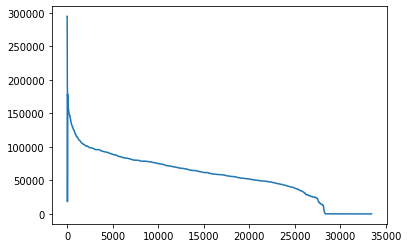

In [78]:
salary = pdf["Salary"].values
x_ax = range(salary.size)
print(salary.size)
plt.plot(x_ax, salary)
plt.show()

In [79]:
salary

array([295000, 295000, 295000, ...,      8,      8,      7], dtype=int32)

In [80]:
print(pdf.groupby('Position').agg({'Salary':'mean'}))


                                       Salary
Position                                     
311 Operations Team Leader       50778.750000
4-h Extension Specialist         60379.000000
9-1-1 Coordinator               107531.000000
A/c Equip Mechanic                  29.714286
A/c Equipment Mechanic           35216.000000
...                                       ...
Ysupervisory Workers Comp Clai   84484.000000
Zoning Administrator            129535.000000
Zoning Data Coordinator          68319.000000
Zoning Specialist                86919.666667
null                            176000.000000

[2624 rows x 1 columns]
